In [1]:
import pandas as pd

In [2]:
pd.read_csv('NewspaperData.csv')

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
Newspaper=pd.read_csv('NewspaperData.csv')

In [4]:
Newspaper.info

<bound method DataFrame.info of                          Newspaper     daily    sunday
0                    Baltimore Sun   391.952   488.506
1                     Boston Globe   516.981   798.298
2                    Boston Herald   355.628   235.084
3               Charlotte Observer   238.555   299.451
4                Chicago Sun Times   537.780   559.093
5                  Chicago Tribune   733.775  1133.249
6              Cincinnati Enquirer   198.832   348.744
7                      Denver Post   252.624   417.779
8              Des Moines Register   206.204   344.522
9                 Hartford Courant   231.177   323.084
10               Houston Chronicle   449.755   620.752
11                Kansas City Star   288.571   423.305
12         Los Angeles Daily  News   185.736   202.614
13               Los Angeles Times  1164.388  1531.527
14                    Miami Herald   444.581   553.479
15        Minneapolis Star Tribune   412.871   685.975
16      New Orleans Times-Picayun

In [5]:
Newspaper.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [6]:
Newspaper.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [9]:
Newspaper.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

#### Linearity Test

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='daily', ylabel='sunday'>

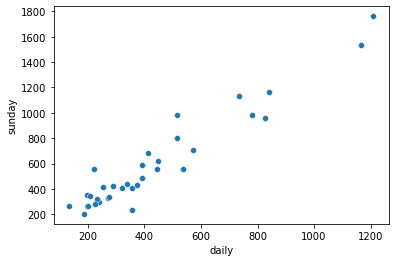

In [8]:
sns.scatterplot(x='daily',y='sunday',data=Newspaper)

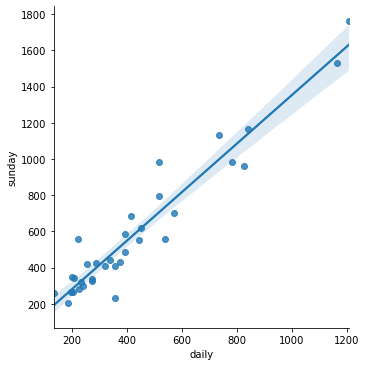

In [9]:
sns.lmplot(x='daily',y='sunday',data=Newspaper)#some what closer to linearity

#### Normality test

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
from matplotlib import pyplot as plt

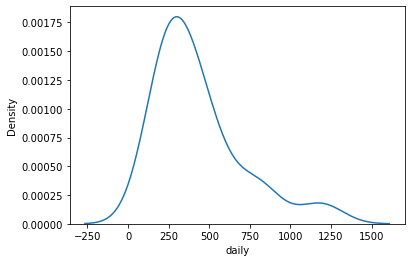

In [16]:
sns.distplot(a=Newspaper['daily'],hist=False)
plt.show()

In [12]:
Newspaper['daily'].skew()

1.5321591323040094

### Multicollinearity check
*correlation matrix
*Variance Inflation Matrix(VIF)

#### Homoscadascity Check And Zero Residual Mean Check

#### Data Preprocessing

In [26]:
del Newspaper['Newspaper']

In [28]:
Newspaper.head(10)

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


### We can achieve linear regression using stats model and sklearn library

In [30]:
#### In stats model we can do model building and training at the same time using OLS technique

  ### Model Building 

In [33]:
import statsmodels.formula.api as smf

In [36]:
Linear_model=smf.ols(formula='sunday~daily',data=Newspaper).fit()

In [44]:
Linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

#### Manual Testing

In [41]:
#y=mx+c
#if x=200,then y=?
(1.339715*200)+13.835630

281.77862999999996

#### Machine Prediction

In [ ]:
Linear_model.predict([200])# we need structured data 

ERROR! Session/line number was not unique in database. History logging moved to new session 98


#### Model Evaluation

#### Model Deployment

In [45]:
from pickle import dump

In [49]:
dump(Linear_model,open('Linear_model.pkl','wb'))#save file

In [50]:
from pickle import load

In [51]:
load(open('Linear_model.pkl','rb'))#fetch